<a href="https://colab.research.google.com/github/Jordana-Metzler/Data-Science/blob/main/Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto Data Science: *analisando os dados da Liga das Nações de vôlei feminino 2024*

## Introdução
Neste projeto, analisamos os dados da Liga das Nações de Vôlei Feminino 2024 (VNL 2024) com o objetivo de identificar os principais fundamentos que contribuíram para o desempenho das seleções participantes e destacar as jogadoras mais eficientes da competição. Como atleta de vôlei, trago minha vivência esportiva para interpretar os dados e validar as conclusões.


## Objetivos
- O que os dados revelam sobre o desempenho das seleções do pódio?
- Quais foram as jogadoras mais eficientes?
- Quais fundamentos (ataque, bloqueio, saque, defesa, recepção) se destacaram?
- Como cada país performou nos fundamentos?
- Como estão distribuídas as posições em quadra?
- Visualizar os países participantes em um mapa interativo.


In [11]:
import pandas as pd
pd.set_option('display.expand_frame_repr', False)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import folium
import ipywidgets as widgets
from IPython.display import display, clear_output

In [12]:
# Fazer upload do arquivo CSV baixado do Kaggle (players.csv)
from google.colab import files
uploaded = files.upload()


Saving vnl.csv to vnl (1).csv


In [13]:
df = pd.read_csv("vnl.csv")
df.head(10)

,player,country,age,attack,block,serve,set,dig,receive,position
0,Vargas,TUR,24,20.25,1.62,1.50,0.0,7.75,0.00,OP
1,Koga,JPN,28,17.67,0.78,1.11,0.0,11.22,1.11,OH
2,Van Ryk,CAN,25,16.44,0.89,1.11,0.0,12.56,0.11,OH
3,Li Y.Y.,CHN,24,16.33,0.56,1.00,0.0,8.22,3.56,OH
4,Gray,CAN,30,15.22,0.44,1.00,0.0,9.44,5.56,OH
5,Egonu,ITA,25,14.60,2.40,2.20,0.0,4.20,0.00,OP
6,Stysiak,POL,23,14.12,1.50,0.38,0.0,8.38,0.00,OP
7,Gabi,BRA,30,14.12,0.88,1.12,0.0,9.50,5.25,OH
8,Ishikawa,JPN,24,13.78,0.56,0.56,0.0,7.67,4.11,OH
9,Ana Cristina,BRA,20,12.62,1.38,0.88,0.0,6.75,4.62,OH


In [14]:
#Renomeando colunas para português
df.rename(columns={
    "player": "jogadora",
    "country": "pais",
    "age": "idade",
    "attack": "ataque",
    "block": "bloqueio",
    "serve": "saque",
    "set": "levantamento",
    "dig": "defesa",
    "receive": "recepcao",
    "position": "posicao"
}, inplace=True)
df.head(10)

,jogadora,pais,idade,ataque,bloqueio,saque,levantamento,defesa,recepcao,posicao
0,Vargas,TUR,24,20.25,1.62,1.50,0.0,7.75,0.00,OP
1,Koga,JPN,28,17.67,0.78,1.11,0.0,11.22,1.11,OH
2,Van Ryk,CAN,25,16.44,0.89,1.11,0.0,12.56,0.11,OH
3,Li Y.Y.,CHN,24,16.33,0.56,1.00,0.0,8.22,3.56,OH
4,Gray,CAN,30,15.22,0.44,1.00,0.0,9.44,5.56,OH
5,Egonu,ITA,25,14.60,2.40,2.20,0.0,4.20,0.00,OP
6,Stysiak,POL,23,14.12,1.50,0.38,0.0,8.38,0.00,OP
7,Gabi,BRA,30,14.12,0.88,1.12,0.0,9.50,5.25,OH
8,Ishikawa,JPN,24,13.78,0.56,0.56,0.0,7.67,4.11,OH
9,Ana Cristina,BRA,20,12.62,1.38,0.88,0.0,6.75,4.62,OH


In [15]:
#Traduzindo valores da coluna de posição
df["posicao"] = df["posicao"].replace({
    "OH": "Ponteira",
    "OP": "Oposta",
    "MB": "Central",
    "S": "Levantadora",
    "L": "Líbero"
})
df.head(10)

,jogadora,pais,idade,ataque,bloqueio,saque,levantamento,defesa,recepcao,posicao
0,Vargas,TUR,24,20.25,1.62,1.50,0.0,7.75,0.00,Oposta
1,Koga,JPN,28,17.67,0.78,1.11,0.0,11.22,1.11,Ponteira
2,Van Ryk,CAN,25,16.44,0.89,1.11,0.0,12.56,0.11,Ponteira
3,Li Y.Y.,CHN,24,16.33,0.56,1.00,0.0,8.22,3.56,Ponteira
4,Gray,CAN,30,15.22,0.44,1.00,0.0,9.44,5.56,Ponteira
5,Egonu,ITA,25,14.60,2.40,2.20,0.0,4.20,0.00,Oposta
6,Stysiak,POL,23,14.12,1.50,0.38,0.0,8.38,0.00,Oposta
7,Gabi,BRA,30,14.12,0.88,1.12,0.0,9.50,5.25,Ponteira
8,Ishikawa,JPN,24,13.78,0.56,0.56,0.0,7.67,4.11,Ponteira
9,Ana Cristina,BRA,20,12.62,1.38,0.88,0.0,6.75,4.62,Ponteira


In [16]:
#Criando colunas adicionais: pontos totais e jogadora_completa
df["pontos_totais"] = df["ataque"] + df["bloqueio"] + df["saque"]
df["jogadora_completa"] = df["jogadora"] + " (" + df["posicao"] + " - " + df["pais"] + ")"
df.head(10)

,jogadora,pais,idade,ataque,bloqueio,saque,levantamento,defesa,recepcao,posicao,pontos_totais,jogadora_completa
0,Vargas,TUR,24,20.25,1.62,1.50,0.0,7.75,0.00,Oposta,23.37,Vargas (Oposta - TUR)
1,Koga,JPN,28,17.67,0.78,1.11,0.0,11.22,1.11,Ponteira,19.56,Koga (Ponteira - JPN)
2,Van Ryk,CAN,25,16.44,0.89,1.11,0.0,12.56,0.11,Ponteira,18.44,Van Ryk (Ponteira - CAN)
3,Li Y.Y.,CHN,24,16.33,0.56,1.00,0.0,8.22,3.56,Ponteira,17.89,Li Y.Y. (Ponteira - CHN)
4,Gray,CAN,30,15.22,0.44,1.00,0.0,9.44,5.56,Ponteira,16.66,Gray (Ponteira - CAN)
5,Egonu,ITA,25,14.60,2.40,2.20,0.0,4.20,0.00,Oposta,19.20,Egonu (Oposta - ITA)
6,Stysiak,POL,23,14.12,1.50,0.38,0.0,8.38,0.00,Oposta,16.00,Stysiak (Oposta - POL)
7,Gabi,BRA,30,14.12,0.88,1.12,0.0,9.50,5.25,Ponteira,16.12,Gabi (Ponteira - BRA)
8,Ishikawa,JPN,24,13.78,0.56,0.56,0.0,7.67,4.11,Ponteira,14.90,Ishikawa (Ponteira - JPN)
9,Ana Cristina,BRA,20,12.62,1.38,0.88,0.0,6.75,4.62,Ponteira,14.88,Ana Cristina (Ponteira - BRA)


In [17]:
#Visão geral dos dados por seleção
df_paises = df.groupby("pais")[["ataque", "bloqueio", "saque", "defesa", "recepcao", "pontos_totais"]].mean().sort_values("pontos_totais", ascending=False).reset_index()
df_paises

,pais,ataque,bloqueio,saque,defesa,recepcao,pontos_totais
0,CHN,4.261538,0.656923,0.360000,3.925385,1.223077,5.278462
1,TUR,4.020000,0.874667,0.376000,3.664667,1.294667,5.270667
2,USA,3.957273,0.745000,0.304545,3.587273,1.234545,5.006818
3,BRA,3.685882,0.890588,0.297059,3.095294,1.019412,4.873529
4,CAN,3.641429,0.547143,0.404286,3.927857,0.841429,4.592857
5,DOM,3.687857,0.586429,0.291429,3.902143,0.900000,4.565714
6,JPN,3.816000,0.414667,0.289333,4.158667,1.206667,4.520000
7,ITA,3.346316,0.727895,0.432105,3.011579,1.000000,4.506316
8,SRB,3.492000,0.657000,0.329000,4.402500,1.825000,4.478000
9,POL,3.324737,0.776316,0.263158,3.160526,0.971053,4.364211


In [18]:
#Países participantes
paises_coords = {
    'Brasil': [-14.2350, -51.9253],
    'Estados Unidos': [37.0902, -95.7129],
    'China': [35.8617, 104.1954],
    'Japão': [36.2048, 138.2529],
    'Polônia': [51.9194, 19.1451],
    'Turquia': [38.9637, 35.2433],
    'Itália': [41.8719, 12.5674],
    'Sérvia': [44.0165, 21.0059],
    'Alemanha': [51.1657, 10.4515],
    'Tailândia': [15.8700, 100.9925],
    'Canadá': [56.1304, -106.3468],
    'Países Baixos': [52.1326, 5.2913],
    'Coreia do Sul': [35.9078, 127.7669],
    'França': [46.6034, 1.8883],
    'República Dominicana': [18.7357, -70.1627],
    'Bulgária': [42.7339, 25.4858]
}

mapa = folium.Map(location=[20, 0], zoom_start=2)

# Adicionar os marcadores dos países
for pais, coords in paises_coords.items():
    folium.Marker(
        location=coords,
        popup=pais,
        tooltip=pais,
        icon=folium.Icon(color='blue', icon='globe')
    ).add_to(mapa)

# Mostrar o mapa

mapa

In [19]:
#Gráfico de fundamentos por país
df_paises_melted = df_paises.melt(id_vars="pais", var_name="Fundamento", value_name="Média")
fig = px.bar(df_paises_melted, x="pais", y="Média", color="Fundamento",
             title="Média de Pontuação por Fundamento - Por Seleção",
             barmode="group", color_discrete_sequence=px.colors.qualitative.Pastel)
fig.show()

In [33]:
focus = df[df["pais"].isin(["ITA", "JPN", "POL", "BRA"])]
focus_grouped = focus.groupby("pais")[["ataque", "bloqueio", "saque", "defesa", "recepcao"]].mean().reset_index()
focus_melted = focus_grouped.melt(id_vars="pais", var_name="Fundamento", value_name="Média")

fig = px.bar(
    focus_melted,
    x="pais",
    y="Média",
    color="Fundamento",
    title="Comparativo dos Fundamentos: ITA x JPN x POL x BRA",
    barmode="group",
    text="Média"
)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

# Destacar o campeão (ITA) com cor diferente
fig.update_traces(
    selector=lambda trace: trace.name and "ITA" in trace.name,
    marker_line_width=2,
    marker_line_color="black"
)

fig.show()


In [35]:
# top 10 jogadoras gerais
df["jogadora_completa"] = df["jogadora"] + " (" + df["posicao"] + " - " + df["pais"] + ")"
top10_geral = df.sort_values("pontos_totais", ascending=False).head(10)

fig = px.bar(
    top10_geral,
    x="pontos_totais",
    y="jogadora_completa",
    color="pais",
    orientation='h',
    title="Top 10 Jogadoras - Pontuação Total",
    text="pontos_totais",
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')
fig.update_layout(yaxis_categoryorder='total ascending')
fig.show()


In [22]:
#Top 5 por ataque
top_ataque = df.sort_values("ataque", ascending=False).head(5)
fig = px.bar(top_ataque, x="ataque", y="jogadora_completa", color="pais", orientation='h',
             title="Top 5 - Ataque",
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(yaxis_categoryorder='total ascending')
fig.show()

In [23]:
# Top 5 por Bloqueio
top_bloqueio = df.sort_values("bloqueio", ascending=False).head(5)
fig = px.bar(top_bloqueio, x="bloqueio", y="jogadora_completa", color="pais", orientation='h',
             title="Top 5 - Bloqueio",
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(yaxis_categoryorder='total ascending')
fig.show()

In [24]:
# Top 5 por Saque
top_saque = df.sort_values("saque", ascending=False).head(5)
fig = px.bar(top_saque, x="saque", y="jogadora_completa", color="pais", orientation='h',
             title="Top 5 - Saque",
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(yaxis_categoryorder='total ascending')
fig.show()

In [25]:
# Top 5 por Defesa
top_defesa = df.sort_values("defesa", ascending=False).head(5)
fig = px.bar(top_defesa, x="defesa", y="jogadora_completa", color="pais", orientation='h',
             title="Top 5 - Defesa",
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(yaxis_categoryorder='total ascending')
fig.show()

In [26]:
#Top 5 por Recepção
top_recepcao = df.sort_values("recepcao", ascending=False).head(5)
fig = px.bar(top_recepcao, x="recepcao", y="jogadora_completa", color="pais", orientation='h',
             title="Top 5 - Recepção",
             color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_layout(yaxis_categoryorder='total ascending')
fig.show()

In [37]:
opcoes = sorted(df['posicao'].dropna().unique())

@widgets.interact(posicao=widgets.Dropdown(options=opcoes, description='Posição:'))
def mostrar_quantidade(posicao):
    clear_output(wait=True)
    print(f"Quantidade de jogadoras na posição '{posicao}': {df[df['posicao'] == posicao].shape[0]}")


interactive(children=(Dropdown(description='Posição:', options=('Central', 'Levantadora', 'Líbero', 'Oposta', …

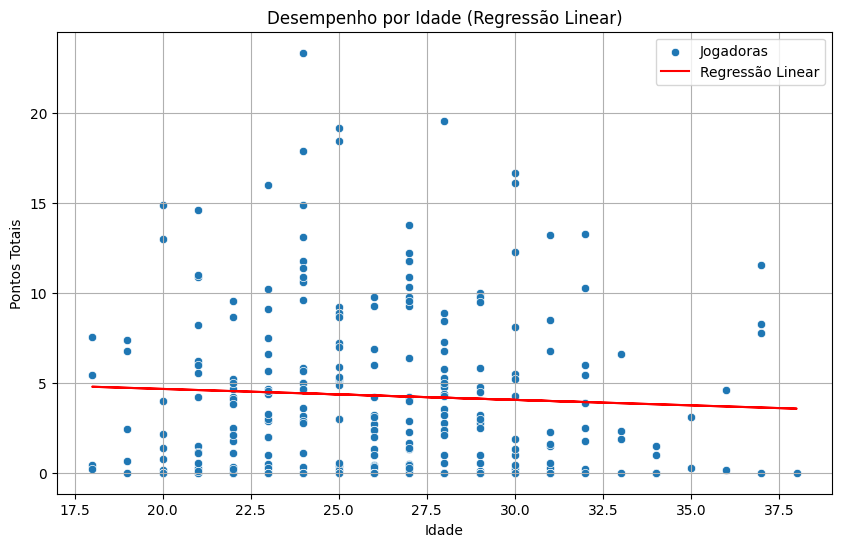

Equação: Pontos Totais = -0.06 * Idade + 5.88


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Remover valores ausentes nas colunas usadas
df_reg = df[['idade', 'pontos_totais']].dropna()

# Separar variáveis independentes e dependentes
X = df_reg[['idade']]
y = df_reg['pontos_totais']

# Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X, y)

# Prever valores
y_pred = modelo.predict(X)

# Plotar gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(x='idade', y='pontos_totais', data=df_reg, label='Jogadoras')
plt.plot(df_reg['idade'], y_pred, color='red', label='Regressão Linear')
plt.xlabel("Idade")
plt.ylabel("Pontos Totais")
plt.title("Desempenho por Idade (Regressão Linear)")
plt.legend()
plt.grid(True)
plt.show()

# Exibir equação da reta
print(f"Equação: Pontos Totais = {modelo.coef_[0]:.2f} * Idade + {modelo.intercept_:.2f}")


### 📌 Análise: Relação entre Idade e Desempenho (Pontos Totais)

Com base na regressão linear aplicada aos dados da Liga das Nações Feminina de Vôlei 2024, obteve-se a seguinte equação:

Pontos Totais = -0.06 × Idade + 5.88


O coeficiente angular negativo indica uma leve tendência de queda no desempenho à medida que a idade aumenta. No entanto, essa influência é extremamente pequena — cerca de 0,06 pontos a menos por ano — o que a torna estatisticamente irrelevante para fins práticos. Isso sugere que a idade, por si só, **não é um fator determinante no desempenho ofensivo** das atletas nesta competição. Jogadoras jovens e experientes apresentam desempenhos semelhantes em termos de pontuação, indicando que **outros fatores**, como **posição, tempo em quadra, condicionamento físico e papel tático**, exercem maior influência nos resultados individuais.


## 📊 Análise: Os dados confirmam o pódio da VNL 2024?

Com base nas estatísticas da Liga das Nações de Vôlei Feminino 2024, os dados confirmam o merecido pódio composto por **Itália**, **Japão** e **Polônia**. A **Itália** apresentou o desempenho mais equilibrado em todos os fundamentos, enquanto o **Japão** liderou com folga os fundamentos defensivos, que caracterizam o estilo de jogo, e a **Polônia**, por sua vez, teve um desempenho sólido especialmente nos bloqueios.

Já a **seleção brasileira**, apesar de figurar entre as melhores em **ataques** e **saques**, teve um baixo aproveitamento nos **fundamentos defensivos** o que comprometeu seu rendimento, resultando na **4ª colocação**.

Nos destaques individuais, **Egonu (ITA)** lidera em pontos, **Inoue** e **Kojima (JPN)** se sobressaem na recepção e defesa, e **Korneluk (POL)** no bloqueio. A análise mostra que **consistência nos fundamentos** foi o diferencial decisivo para o sucesso das equipes no torneio.


## 🏅 Comparando a Seleção Ideal com a Seleção Oficial da VNL 2024

Além da análise por país e fundamentos, também é possível observar os destaques individuais da competição. A Federação Internacional de Voleibol (FIVB) seleciona, ao final do torneio, uma **seleção do campeonato**, composta pelas atletas que mais se destacaram tecnicamente e taticamente em suas posições.

Neste projeto, com base nos dados estatísticos da VNL 2024, construímos uma **seleção ideal baseada em desempenho quantitativo**.

A seguir, comparamos essa seleção ideal com a **seleção oficial divulgada pela FIVB**, refletindo sobre as semelhanças e diferenças entre desempenho numérico e impacto real dentro da competição.

In [45]:
import pandas as pd
import plotly.graph_objects as go

dados = {
    "Posição": ["Levantadora", "Oposta", "Ponteira ", "Ponteira ", "Central ", "Central ", "Líbero"],
    "Ideal": [
        "Alessia Orro (ITA)", "Paola Egonu (ITA)", "Gabi Guimarães (BRA)",
        "Arisa Inoue (JPN)", "Agnieszka Korneluk (POL)", "Sarah Fahr (ITA)",
        "Manami Kojima (JPN)"
    ],
    "Oficial": [
        "Alessia Orro (ITA)", "Paola Egonu (ITA)", "Myriam Sylla (ITA)",
        "Sarina Koga (JPN)", "Sarah Fahr (ITA)", "Agnieszka Korneluk (POL)",
        "Manami Kojima (JPN)"
    ]
}

df = pd.DataFrame(dados)

# Gerar lista de cores para cada célula (lavender se iguais, pink se diferentes)
cores = [
    ['lavender'] * len(df)] + [
    ['lavender' if i == j else 'mistyrose' for i, j in zip(df['Ideal'], df['Oficial'])]
]

# Criar tabela
fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='paleturquoise',
                align='center'),
    cells=dict(values=[df[col] for col in df.columns],
               fill_color=cores,
               align='center'))
])

fig.update_layout(
    title="Comparativo: Seleção Ideal x Seleção Oficial da VNL 2024",
    height=380,
    margin=dict(l=20, r=20, t=50, b=100)
)
fig.show()


### 🧠 Conclusão da Comparação

A análise mostra que, em grande parte, a **seleção oficial da VNL 2024 coincide com os dados** estatísticos. Nomes como **Paola Egonu**, **Alessia Orro**, **Sarah Fahr** e **Agnieszka Korneluk** aparecem em ambas as seleções, confirmando seus desempenhos de destaque.

As principais **diferenças** aparecem nas escolhas de ponteiras: enquanto os dados apontam para **Gabi Guimarães (BRA)** e **Arisa Inoue (JPN)** como mais eficientes em pontuação e regularidade, a seleção oficial optou por **Myriam Sylla (ITA)** e **Sarina Koga (JPN)**.

Essa comparação reforça que **a performance estatística é essencial**, mas **a escolha da seleção oficial também leva em conta aspectos subjetivos** e qualitativos, como equilíbrio tático, protagonismo em jogos decisivos e contribuição coletiva para o sucesso da equipe.
